**Data mining Project - University of Pisa, acedemic year 2023/24**

**Authors**: Giacomo Aru, Giulia Ghisolfi, Luca Marini, Irene Testa

# Elections data understanding and preparation

We import the libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as pyo

We define constants and settings for the notebook:

In [2]:
%matplotlib inline

import sys, os
sys.path.append(os.path.abspath('..'))
from plot_utils import *

DATA_FOLDER_PATH = '../data/'

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

We load the dataset:

In [3]:
elections_path = DATA_FOLDER_PATH + 'year_state_district_house.csv'
elections_df = pd.read_csv(elections_path)

We assess the correct loading of the dataset printing the first 2 rows:

In [4]:
elections_df.head(n=2)

,year,state,congressional_district,party,candidatevotes,totalvotes
0,1976,ALABAMA,1,REPUBLICAN,98257,157170
1,1976,ALABAMA,2,REPUBLICAN,90069,156362


This dataset contains information about the winner of the congressional elections in the USA, for each year, state and congressional district.

In the following table we provide the characteristics of each attribute of the dataset. To define the type of the attributes we used the categorization described by Pang-Ning Tan, Michael Steinbach and Vipin Kumar in the book *Introduction to Data Mining*. For each attribute, we also reported the desidered pandas `dtype` for later analysis.

| # | Name | Type | Description | Desired dtype |
| :-: | :--: | :--: | :---------: | :------------: |
| 0 | year | Numeric (Interval) | Year | int64 |
| 1 | state | Categorical (Nominal) | Name of the state | object |
| 2 | congressional_district | Categorical (Nominal) | Congressional district | int64 |
| 3 | party | Categorical (Nominal) | Winning party fort the corresponding congressional_district in the state, in the corresponding year | object |
| 4 | candidatevotes | Numeric (Ratio) | Number of votes obtained by the winning party in the corresponding election | int64 |
| 5 | totalvotes | Numeric (Ratio)| Number total votes for the corresponding election | int64 |

We display a concise summary of the DataFrame:

In [5]:
elections_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    10441 non-null  int64 
 1   state                   10441 non-null  object
 2   congressional_district  10441 non-null  int64 
 3   party                   10441 non-null  object
 4   candidatevotes          10441 non-null  int64 
 5   totalvotes              10441 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 489.5+ KB


We notice that:
- the inferred types are correct
- there are no missing values (however, we should still assess whether there are any missing rows for specific years, states, or congressional districts)

We display descriptive statistics:

In [6]:
elections_df.describe(include='all')

,year,state,congressional_district,party,candidatevotes,totalvotes
count,10441.000000,10441,10441.000000,10441,1.044100e+04,1.044100e+04
unique,NaN,51,NaN,6,NaN,NaN
top,NaN,CALIFORNIA,NaN,DEMOCRAT,NaN,NaN
freq,NaN,1196,NaN,5513,NaN,NaN
mean,1999.002011,NaN,9.873096,NaN,1.345276e+05,2.076422e+05
std,13.845898,NaN,10.017078,NaN,5.160721e+04,8.262643e+04
min,1976.000000,NaN,0.000000,NaN,-1.000000e+00,-1.000000e+00
25%,1988.000000,NaN,3.000000,NaN,1.004870e+05,1.554510e+05
50%,2000.000000,NaN,6.000000,NaN,1.290850e+05,2.004450e+05
75%,2012.000000,NaN,13.000000,NaN,1.653710e+05,2.555770e+05


We notice that:
- year spans from 2004 to 2020
- there are 6 unique parties
- the minimum of candidatevotes and totalvotes are negative numbers, meaning that there are actually missing values

First we check if the triple <`year`, `state`, `congressional_district`> uniquely identifies each row:

In [7]:
elections_df.groupby(['year', 'state', 'congressional_district']).size().max() == 1

True

Then, we check if `candidatevotes` are always less or equal than `totalvotes`:

In [8]:
elections_df[elections_df['candidatevotes'] <= elections_df['totalvotes']].size == elections_df.size

True

We list the unique values in the column `state`:

In [9]:
states = elections_df['state'].unique()
states.sort()
print(f'States: {states}')
print(f'Number of states: {states.size}')

States: ['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE'
 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK' 'NORTH CAROLINA' 'NORTH DAKOTA'
 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE ISLAND' 'SOUTH CAROLINA'
 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT' 'VIRGINIA'
 'WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING']
Number of states: 51


All the states (District of Columbia included) are present.

We now display the states and the years for which there are missing rows:

In [10]:
years = [i for i in range(elections_df['year'].min(), elections_df['year'].max(), 2)]
for year in years:
    for state in states:
        if elections_df[(elections_df['state']==state) & (elections_df['year']==year)].size == 0:
            print(f"No data for '{state}' in {year}")

No data for 'DISTRICT OF COLUMBIA' in 1976
No data for 'DISTRICT OF COLUMBIA' in 1978
No data for 'DISTRICT OF COLUMBIA' in 1980
No data for 'DISTRICT OF COLUMBIA' in 1982
No data for 'DISTRICT OF COLUMBIA' in 1984
No data for 'DISTRICT OF COLUMBIA' in 1986
No data for 'DISTRICT OF COLUMBIA' in 1988
No data for 'DISTRICT OF COLUMBIA' in 1990
No data for 'DISTRICT OF COLUMBIA' in 1992
No data for 'DISTRICT OF COLUMBIA' in 1994
No data for 'DISTRICT OF COLUMBIA' in 1996
No data for 'DISTRICT OF COLUMBIA' in 1998
No data for 'DISTRICT OF COLUMBIA' in 2000
No data for 'DISTRICT OF COLUMBIA' in 2002
No data for 'DISTRICT OF COLUMBIA' in 2004
No data for 'DISTRICT OF COLUMBIA' in 2006
No data for 'DISTRICT OF COLUMBIA' in 2008
No data for 'DISTRICT OF COLUMBIA' in 2010
No data for 'DISTRICT OF COLUMBIA' in 2012
No data for 'DISTRICT OF COLUMBIA' in 2014
No data for 'DISTRICT OF COLUMBIA' in 2016
No data for 'DISTRICT OF COLUMBIA' in 2018


Except for District of Columbia, there are no missing rows.
For District of Columbia we have only the following row:

In [11]:
elections_df[elections_df['state']=='DISTRICT OF COLUMBIA']

,year,state,congressional_district,party,candidatevotes,totalvotes
9657,2020,DISTRICT OF COLUMBIA,0,DEMOCRAT,281831,344177


Missing values are probably due to the fact that District of Columbia is a non voting delegate district. Anyway, we gathered the missing values from Wikipedia. We noticed that as for the 2020 elecetions, the number of votes received by the winning party coincides, but the number of totalvotes is different (see [here](https://en.wikipedia.org/wiki/2020_United_States_House_of_Representatives_election_in_the_District_of_Columbia)). To be consistent with the other data, we replace the totalvotes value from 2020 with the one from Wikipedia.

Now we import those data:

In [12]:
dc_elections_df = pd.read_csv('../data/external_data/district_of_columbia_house.csv')
dc_elections_df.head(n=2)

,year,state,congressional_district,party,candidatevotes,totalvotes
0,1976,DISTRICT OF COLUMBIA,0,DEMOCRAT,12149,15742
1,1978,DISTRICT OF COLUMBIA,0,DEMOCRAT,76557,96306


We display a concise summary of the DataFrame:

In [13]:
dc_elections_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    24 non-null     int64 
 1   state                   24 non-null     object
 2   congressional_district  24 non-null     int64 
 3   party                   24 non-null     object
 4   candidatevotes          24 non-null     int64 
 5   totalvotes              24 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.2+ KB


The inferred types are correct.

We now merge the two dataframes:

In [14]:
elections_df.drop(elections_df[elections_df['state']=='DISTRICT OF COLUMBIA'].index, inplace=True)
elections_df = pd.concat([elections_df, dc_elections_df], ignore_index=True)
elections_df.sort_values(by=['year', 'state', 'congressional_district'], inplace=True, ignore_index=True)

We now check if congressional districts are numbered correctly (with '0' for states with only one congressional district, or with incremental values starting from '1' otherwise):

In [15]:
correct_numbering = True
for state in states:
    if state == 'DISTRICT OF COLUMBIA':
        continue
    for year in years:
        districts = elections_df[(elections_df['state']==state) & (elections_df['year']==year)]['congressional_district'].unique()
        districts.sort()
        if districts.size > 1:
            if (districts != [i for i in range(1, districts.size+1)]).any():
                correct_numbering = False
                break
        elif districts[0] != 0:
            correct_numbering = False
            break
correct_numbering

True

We now plot the distribution of `totalvotes` for each state in the years of interest, excluding 0 and negative values (this plot makes sense because congressional districts are redrawn so that the population of each district is roughly equal):

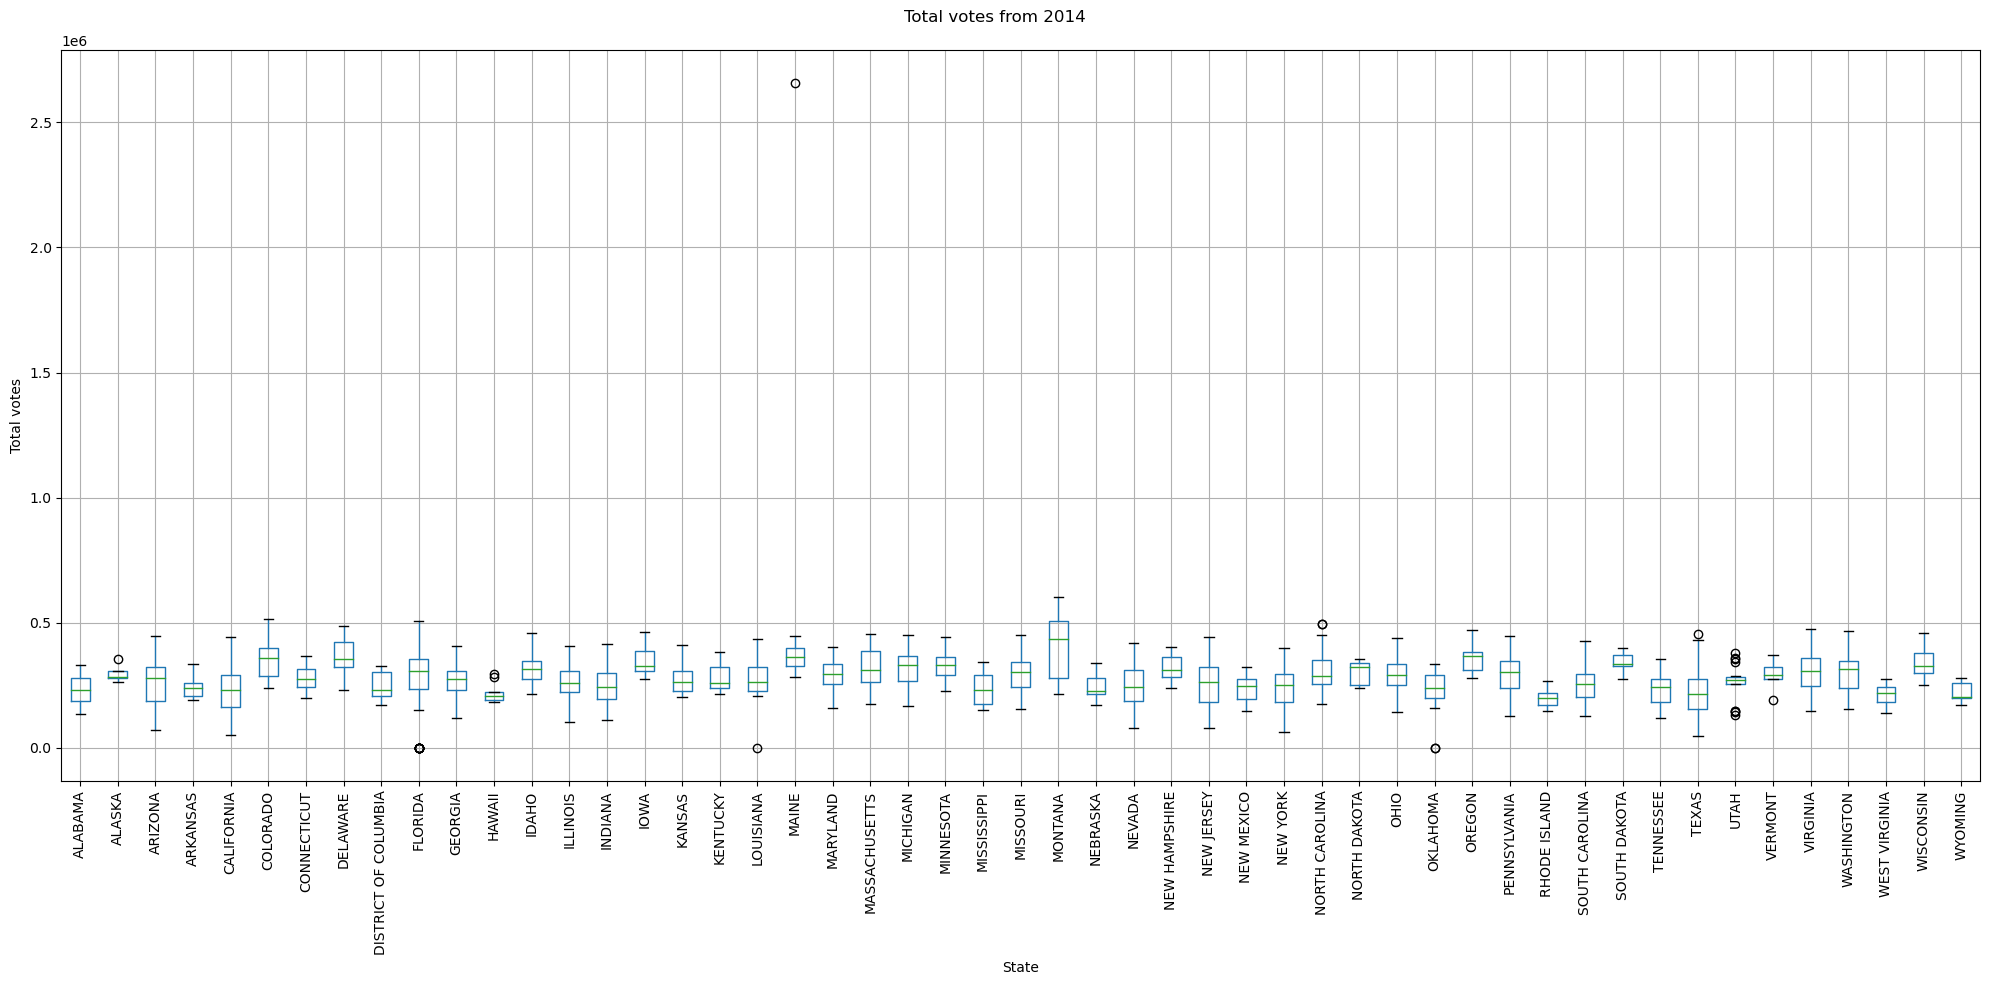

In [16]:
elections_df[
    (elections_df['totalvotes']>0)&(elections_df['year']>2012)
].boxplot(column='totalvotes', by='state', figsize=(20, 10), rot=90, xlabel='State', ylabel='Total votes')
plt.suptitle('Total votes from 2014')
plt.title('')
plt.tight_layout()

We can observe that for both total and candidate votes Florida, Louisian and Oklahoma have lower outliers, while Maine has an upper outlier. 

We display the rows relative to Maine:

In [17]:
elections_df[(elections_df['year']>2013) & (elections_df['state']=='MAINE')]

,year,state,congressional_district,party,candidatevotes,totalvotes
8464,2014,MAINE,1,DEMOCRAT,186674,321987
8465,2014,MAINE,2,REPUBLICAN,133320,295009
8900,2016,MAINE,1,DEMOCRAT,227546,406942
8901,2016,MAINE,2,REPUBLICAN,192878,364886
9336,2018,MAINE,1,DEMOCRAT,201195,342053
9337,2018,MAINE,2,DEMOCRAT,139231,281371
9772,2020,MAINE,1,DEMOCRAT,271004,447981
9773,2020,MAINE,2,DEMOCRAT,197974,380324
10208,2022,MAINE,1,DEMOCRAT,219753,358138
10209,2022,MAINE,2,DEMOCRAT,1165136,2656104


We found in [Wikipedia](https://en.wikipedia.org/wiki/2022_United_States_House_of_Representatives_elections_in_Maine) that in Maine, that year, the Democratic party received 165136 votes out of a total of 311278 votes. We correct the error:

In [18]:
elections_df.loc[
    (elections_df['state']=='MAINE') &
    (elections_df['year']==2022) &
    (elections_df['congressional_district']==2),
    'candidatevotes'] = 165136
elections_df.loc[
    (elections_df['state']=='MAINE') &
    (elections_df['year']==2022) &
    (elections_df['congressional_district']==2),
    'totalvotes'] = 311278

In [19]:
elections_df[
    (elections_df['year']>2013) &
    (elections_df['state'].isin(['FLORIDA', 'LOUSIANA', 'OKLAHOMA'])) &
    ((elections_df['candidatevotes']<100) | (elections_df['totalvotes']<100))
]

,year,state,congressional_district,party,candidatevotes,totalvotes
8383,2014,FLORIDA,12,REPUBLICAN,1,1
8385,2014,FLORIDA,14,DEMOCRAT,1,1
8396,2014,FLORIDA,25,REPUBLICAN,1,1
8398,2014,FLORIDA,27,REPUBLICAN,1,1
8599,2014,OKLAHOMA,1,REPUBLICAN,1,1
8831,2016,FLORIDA,24,DEMOCRAT,0,0
9035,2016,OKLAHOMA,1,REPUBLICAN,1,1
9253,2018,FLORIDA,10,DEMOCRAT,1,1
9257,2018,FLORIDA,14,DEMOCRAT,1,1
9264,2018,FLORIDA,21,DEMOCRAT,1,1


We found in Wikipedia (e.g. [here](https://en.wikipedia.org/wiki/2014_United_States_House_of_Representatives_elections_in_Florida)), that for all the years and states above, no candidates filed to challenge the incumbent representative for their seat. Therefore, we will copy the `candidatevotes` and `totalvotes` values from the previous year:

In [20]:
for index, row in elections_df.iterrows():
    if row['candidatevotes'] < 2:
        replacement = elections_df[
            (elections_df['year']==row['year']-2) &
            (elections_df['state']==row['state']) &
            (elections_df['congressional_district']==row['congressional_district'])
        ]
        if replacement.size > 0:
            elections_df.at[index, 'candidatevotes'] = replacement['candidatevotes'].iloc[0]
            elections_df.at[index, 'totalvotes'] = replacement['totalvotes'].iloc[0]

We now plot the distribution of `totalvotes` (summing over the districts) after cleaning the data:

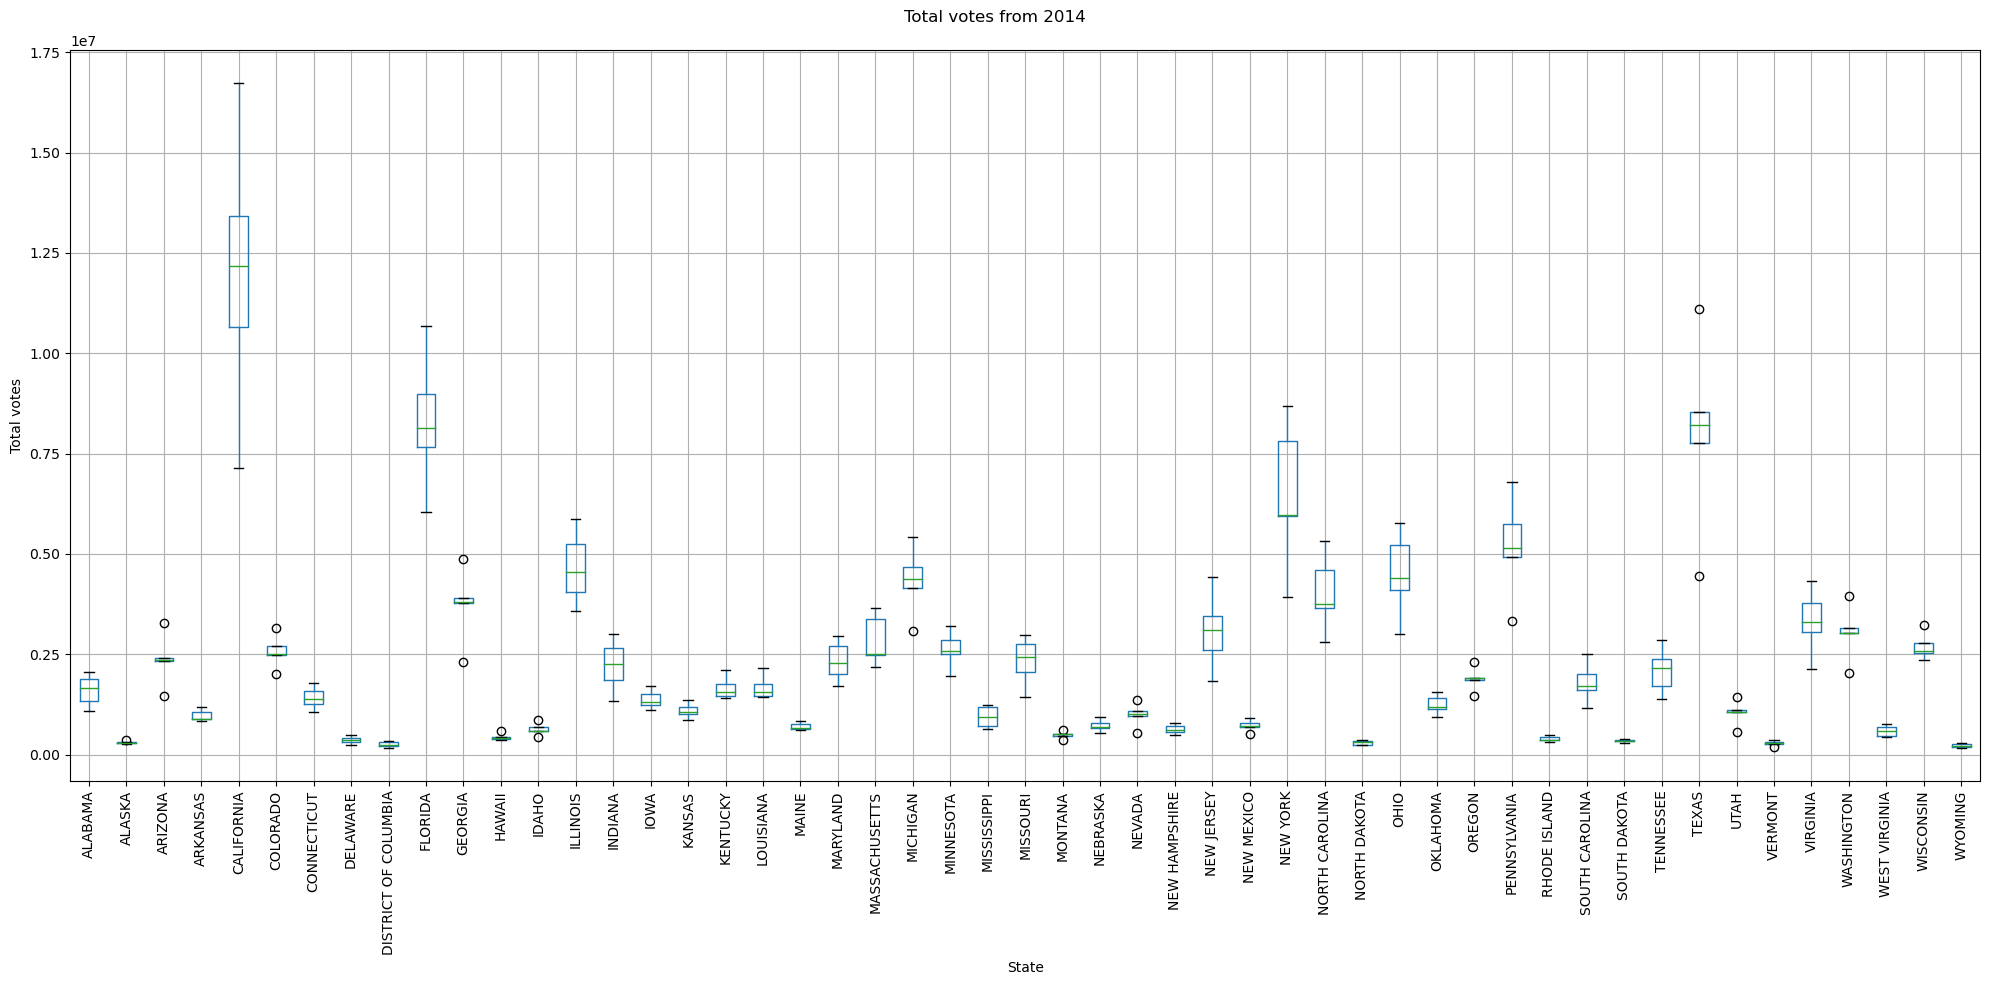

In [21]:
elections_df[
    elections_df['year']>2012
].groupby(['year', 'state']).agg('sum', numeric_only=True).boxplot(column='totalvotes', by='state', figsize=(20, 10), rot=90, xlabel='State', ylabel='Total votes')
plt.suptitle('Total votes from 2014')
plt.title('')
plt.tight_layout()

It is evident that in some states the number of votes fluctuates significantly from year to year.

We get the unique names of the parties for the years of interest:

In [22]:
elections_df[
    (elections_df['year']>2012)
]['party'].unique()

array(['REPUBLICAN', 'DEMOCRAT', 'DEMOCRATIC-FARMER-LABOR'], dtype=object)

The Democratic Farmer Labor is the affiliate of the Democratic Party in the U.S. state of Minnesota [[Wikipedia](https://en.wikipedia.org/wiki/Minnesota_Democratic–Farmer–Labor_Party)], hence we replace this party name with 'DEMOCRATIC' to ease later analysis.

In [23]:
elections_df['party'] = elections_df['party'].apply(
    lambda x: 'DEMOCRAT' if x=='DEMOCRATIC-FARMER-LABOR' else x
)

We now compute the percentage of votes obtained by the winner party and we plot the distribution of these percentages for the years of interest:

In [24]:
elections_df['candidateperc'] = (elections_df['candidatevotes']/elections_df['totalvotes'])*100

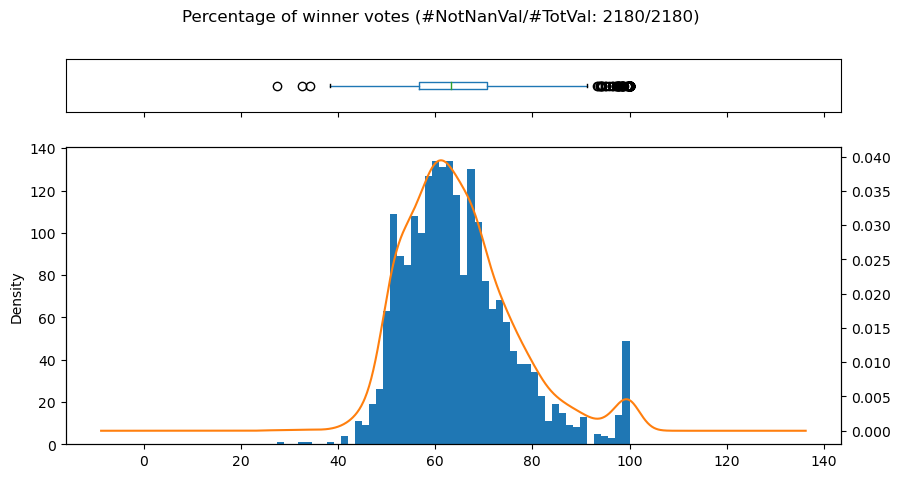

In [25]:
hist_box_plot(elections_df[elections_df['year']>2012], col='candidateperc', title='Percentage of winner votes')

It seems that in some districts the winner party obtained 100% of the votes. We disaply those districts:

In [26]:
elections_df[(elections_df['candidateperc']==100) & (elections_df['year']>2012)]

,year,state,congressional_district,party,candidatevotes,totalvotes,candidateperc
8401,2014,GEORGIA,3,REPUBLICAN,156277,156277,100.0
8403,2014,GEORGIA,5,DEMOCRAT,170326,170326,100.0
8409,2014,GEORGIA,11,REPUBLICAN,161532,161532,100.0
8411,2014,GEORGIA,13,DEMOCRAT,159445,159445,100.0
8412,2014,GEORGIA,14,REPUBLICAN,118782,118782,100.0
8589,2014,OHIO,7,REPUBLICAN,143959,143959,100.0
8622,2014,PENNSYLVANIA,14,DEMOCRAT,148351,148351,100.0
8623,2014,PENNSYLVANIA,15,REPUBLICAN,128285,128285,100.0
8626,2014,PENNSYLVANIA,18,REPUBLICAN,166076,166076,100.0
8649,2014,TEXAS,4,REPUBLICAN,115085,115085,100.0


Wikipedia reports the same data, in those cases there was not an opponent party.

The histogram above also shows that in some disticts the winner party obtained less than 50% of the votes. We display some of those districts:

In [27]:
elections_df[(elections_df['candidateperc']<=30) & (elections_df['year']>2012)]

,year,state,congressional_district,party,candidatevotes,totalvotes,candidateperc
8896,2016,LOUISIANA,3,REPUBLICAN,77671,282443,27.499708


Searching in [Wikipedia](https://en.wikipedia.org/wiki/2016_United_States_House_of_Representatives_elections_in_Louisiana) we found that the number of candidatevotes refers to the votes obtained by the winner at the final runoff (in which less people went to vote) while the number of totalvotes refers to the voter at the runoff plus the votes for the other candidates at the primary election. We won't correct these errors but we will keep it in mind for later analysis.

Now we compute, for each year and state, the party with the highest percentage of votes, so to have a better understanding of the political orientation of each state:

In [28]:
usa_states_df = pd.read_csv(
    'https://www2.census.gov/geo/docs/reference/state.txt',
    sep='|',
    dtype={'STATE': str, 'STATE_NAME': str}
)
usa_name_alphcode = usa_states_df.set_index('STATE_NAME').to_dict()['STUSAB']
winning_party_per_state = elections_df.groupby(['year', 'state', 'party'])['candidateperc'].mean()
winning_party_per_state = winning_party_per_state.groupby(['year', 'state']).idxmax().apply(lambda x: x[2])
winning_party_per_state = winning_party_per_state.to_frame()
winning_party_per_state.reset_index(inplace=True)
winning_party_per_state.rename(columns={'candidateperc': 'majority_state_party'}, inplace=True)
winning_party_per_state['px_code'] = winning_party_per_state['state'].str.title().map(usa_name_alphcode)
winning_party_per_state

,year,state,majority_state_party,px_code
0,1976,ALABAMA,DEMOCRAT,AL
1,1976,ALASKA,REPUBLICAN,AK
2,1976,ARIZONA,REPUBLICAN,AZ
3,1976,ARKANSAS,REPUBLICAN,AR
4,1976,CALIFORNIA,DEMOCRAT,CA
...,...,...,...,...
1219,2022,VIRGINIA,DEMOCRAT,VA
1220,2022,WASHINGTON,REPUBLICAN,WA
1221,2022,WEST VIRGINIA,REPUBLICAN,WV
1222,2022,WISCONSIN,DEMOCRAT,WI


We now plot on a map the winning party over the years:

In [29]:
fig = px.choropleth(
    winning_party_per_state[winning_party_per_state['year']>2004],
    locations='px_code',
    locationmode="USA-states",
    color='majority_state_party',
    scope="usa",
    animation_frame='year',
    title="Results of the elections over the years", 
    hover_name='state',
    hover_data={'px_code': False}
)
fig.update_layout(
    legend_title_text='Party'
)
pyo.plot(fig, filename='../html/animation_elections.html', auto_open=False)
fig.show()

We write the cleaned dataset to a csv file:

In [30]:
elections_df.to_csv('../data/year_state_district_house_cleaned.csv', index=False)